## Analysis of transects
First we are going to analyse transects from the individuals logs whihc are generated at the end of each batch run, so technocally for each environment we only have 30 individual logs and they all refer to a point in time in the iteration which correspond to iteration =  50000


### Housekeeping and importing folders

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.lines import Line2D
import seaborn as sns
import os
import re
import imageio

In [6]:
from folders_paths import *
print(folder_labels, folder_paths)

[5, 10, 20, 25, 50, 100] ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/100k_iter/w5', '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/100k_iter/w10', '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/100k_iter/w20', '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/100k_iter/w25', '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/100k_iter/w50', '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/100k_iter/w100']


In [ ]:
# combined_transects = pd.read_csv('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/100k_iter/w50_megabatch/grids_15dp_50w_SR_4258sims.csv', sep=';')

# print(combined_transects.head())


## Transect in middle of picture
Creating a loop that will take all of the files, all of the individuals on a transect in the middle of the picture

In [ ]:
# all_stats = []

# for i, folder_path in enumerate(folder_paths):
#     # creating a loop that will take all of the files, all of the individuals on a transect in the middle of the picture
#     # create an empty dataframe to store the transects in the current folder
#     transects = pd.DataFrame(columns=['X coord', 'Species Richness', 'Simulation'])
            
#     for filename in os.listdir(folder_path):
#         match = re.match(r'REvoSim_individuals_data_.*\.txt', filename)
#         if match:
#             file_path = os.path.join(folder_path, filename)
#             # import file 
#             df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
#             # take all the records that have y = 49 (a transect in the middle)
#             df = df[df['Y coord'] == 49]
#             df = df[['X coord', 'species ID', 'environment B value']]
#             species_count = df.groupby('X coord')['species ID'].nunique().reset_index()
#             species_count['Simulation'] = filename
#             species_count =species_count.rename(columns={'species ID': 'Species Richness'} )
            
#             transects = pd.concat([transects, species_count], ignore_index=True)
    
#     # Calculate some stats that will be plotting 
#     stats = transects.groupby('X coord')['Species Richness'].agg(['mean', 'median', 'var', 'max', 'min', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)]).reset_index()
#     stats.columns = ['X coord', 'Average', 'Median', 'Variance', 'max', 'min', '2nd Quantile', '3rd Quantile']
#     stats['Environment'] = folder_labels[i]
    
#     # Append the stats dataframe to the list
#     all_stats.append(stats)
    
# # Concatenate all the stats dataframes into a single dataframe
# stats_combined = pd.concat(all_stats, ignore_index=True)



In [6]:
# importing all data from all file so I have a table that I can access later. 
all_transects = []
all_sin = []

for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals on a transect in the middle of the picture
    # create an empty dataframe to store the transects in the current folder
    transects = pd.DataFrame(columns=['X coord', 'Species Richness', 'Simulation'])
    colour_transects = pd.DataFrame(columns=['X coord', 'environment B value', 'Simulation'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_.*\.txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            # take all the records that have y = 49 (a transect in the middle)
            df = df[df['Y coord'] == 49]
            df = df[['X coord', 'species ID', 'environment B value']]
            species_count = df.groupby('X coord')['species ID'].nunique().reset_index()
            species_count['Simulation'] = filename
            species_count =species_count.rename(columns={'species ID': 'Species Richness'} )
            
            colour_cell = df[['X coord', 'environment B value']]
            colour_cell = colour_cell.drop_duplicates(subset=['X coord', 'environment B value'], keep='first')
            colour_cell['Simulation'] = filename
            
            transects = pd.concat([transects, species_count], ignore_index=True)
            transects['Environment'] = folder_labels[i]
            colour_transects = pd.concat([colour_transects, colour_cell], ignore_index=True)
            colour_transects['Environment'] = folder_labels[i]
    
    # Append the stats dataframe to the list
    all_transects.append(transects)
    all_sin.append(colour_transects)
# Concatenate all DataFrames from different folders into a single DataFrame
combined_transects = pd.concat(all_transects, ignore_index=True)
combined_colsin = pd.concat(all_sin, ignore_index=True)

    

In [ ]:
combined_transects.to_csv('combined_transects_w50_15dp.csv')
combined_colsin.to_csv('combined_colsin_w50_15dp.csv')

Text(0.5, 0, 'X Coordinate')

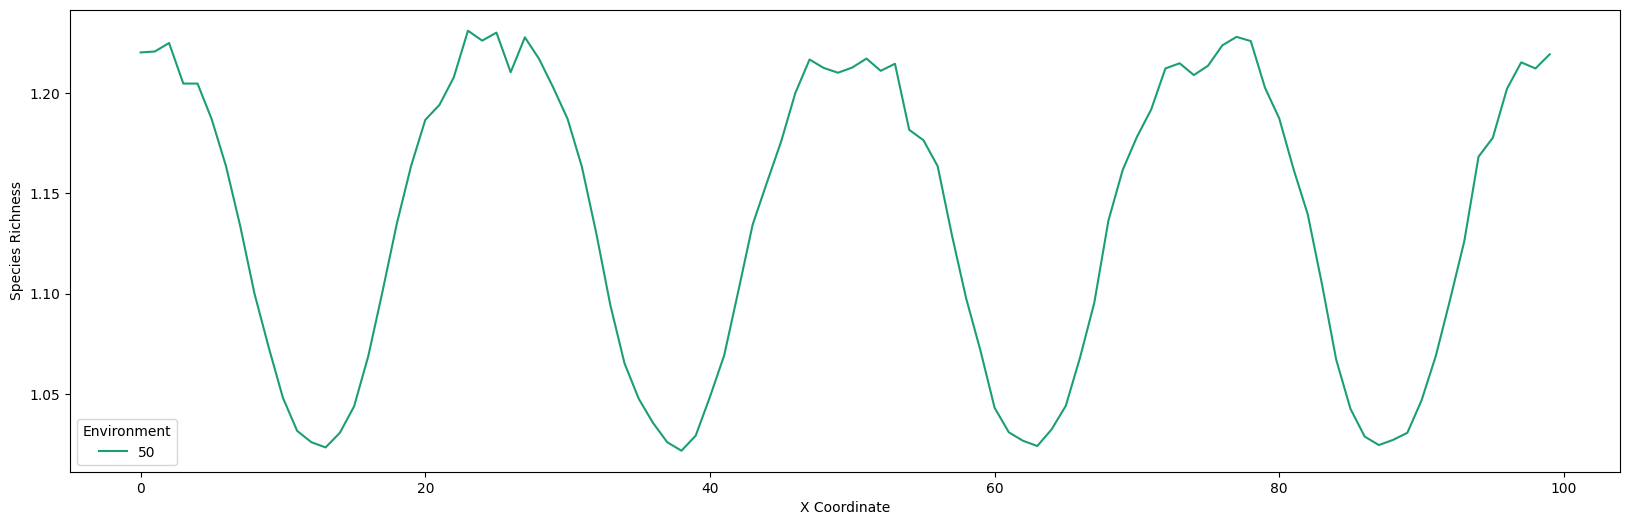

In [ ]:
### create a plot of transect
plt.subplots(figsize=(20, 6))
sns.lineplot( data = combined_transects, x = 'X coord', y = 'Species Richness', hue = 'Environment', palette = 'Dark2', errorbar=None)
plt.xlabel('X Coordinate')

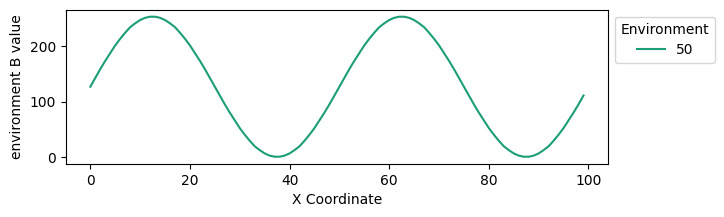

In [ ]:
### create a plot of colour 
plt.subplots(figsize = (7, 2))
col = sns.lineplot( data = combined_colsin, x = 'X coord', y = 'environment B value', hue = 'Environment', palette='Dark2', errorbar=None)
plt.xlabel('X Coordinate')
sns.move_legend(col, "upper left", bbox_to_anchor=(1, 1))

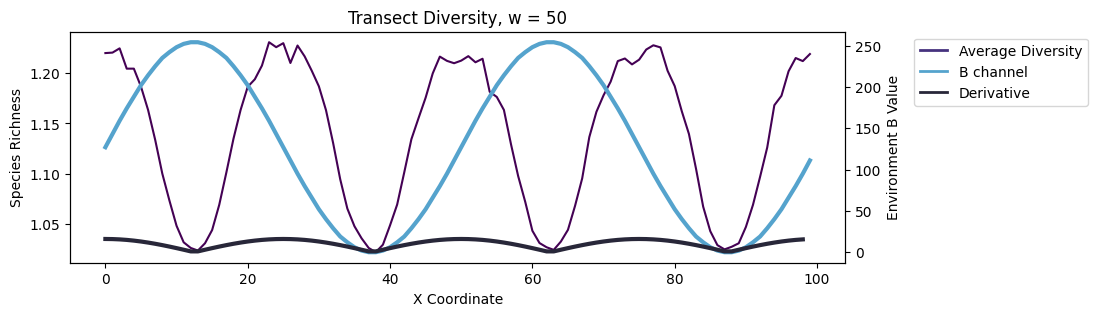

In [ ]:

### create a plot of transect with confidence intervall
environments = combined_transects['Environment'].unique()

for env in environments:
    env_data = combined_transects[combined_transects['Environment'] == env]
    col_data = combined_colsin[combined_colsin['Environment'] == env]
    
    # First axis
    fig, ax1 = plt.subplots(figsize=(10, 3))
    sns.lineplot(data=env_data, x='X coord', y='Species Richness', hue='Environment', palette='viridis', ax=ax1, errorbar=None)
    ax1.set_xlabel('X Coordinate')
    ax1.set_ylabel('Species Richness')
    ax1.set_title(f'Transect Diversity, w = {env}')

    # Second axis 
    ax2 = ax1.twinx()
    sns.lineplot(data=col_data, x='X coord', y='environment B value', ax=ax2, color=sns.color_palette('icefire')[0], linewidth = 3)
    ax2.set_ylabel('Environment B Value')
    #ax2.legend(loc='upper right')
    
    #add derivative of sin env function
    # look if there are fucntions related to the environment function that would describe the diversity curve. 
    wavelength = env # define the variable that contains the wavelength
    cosfun = (255/2) * (1+ abs(np.cos(2 * np.pi * (list(range(0,99)) / wavelength)))) # this is just a cos fun that seems to describe well the diversity trend
    devsin = (255* np.pi * abs(np.cos(2 * np.pi * (list(range(0,99)) / wavelength))))/wavelength # this is the direvative of teh environment function
    # lineplot of derivative
    ax2.plot(list(range(0,99)) , devsin, color = sns.color_palette('icefire')[2], linewidth = 3 )
    
   # Custom legend
    legend_elements = [
        Line2D([0], [0], color=sns.color_palette('viridis')[0], lw=2, label='Average Diversity'),
        Line2D([0], [0], color=sns.color_palette('icefire')[0], lw=2, label='B channel', linewidth = 3),
        Line2D([0], [0], color=sns.color_palette('icefire')[2], lw=2, label='Derivative', linewidth = 3)
    ]
    ax1.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.08, 1))

    
    plt.show()

In [ ]:
# count how many simulations are in each folder
sim_num = combined_transects.groupby('Environment')['Simulation'].nunique().reset_index()
print(sim_num)

   Environment  Simulation
0           50        4258


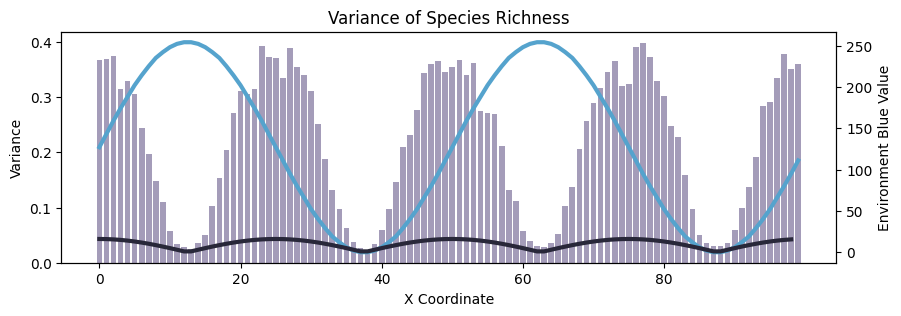

In [ ]:
for env in environments:
    env_data = stats_combined[stats_combined['Environment'] == env]
    col_data = combined_colsin[combined_colsin['Environment'] == env]
    
    # Create figure and primary axis
    fig, ax1 = plt.subplots(figsize=(10, 3))

    # Plot the Variance data
    sns.barplot(data=env_data, x='X coord', y='Variance', color=sns.color_palette('viridis')[0], ax=ax1, alpha = 0.5)

    # Set xticks at every 20 units
    ax1.set_xticks(range(0, len(stats['X coord']), 20))
    ax1.set_xlabel('X Coordinate')
    ax1.set_ylabel('Variance')
    ax1.set_title('Variance of Species Richness')

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    sns.lineplot(data=col_data, x='X coord', y='environment B value', ax=ax2, color=sns.color_palette('icefire')[0], linewidth = 3)
    ax2.set_ylabel("Environment Blue Value")


    #add derivative of sin env function
    # look if there are fucntions related to the environment function that would describe the diversity curve. 
    wavelength = env # define the variable that contains the wavelength
    cosfun = (255/2) * (1+ abs(np.cos(2 * np.pi * (list(range(0,99)) / wavelength)))) # this is just a cos fun that seems to describe well the diversity trend
    devsin = (255* np.pi * abs(np.cos(2 * np.pi * (list(range(0,99)) / wavelength))))/wavelength # this is the direvative of teh environment function
    # lineplot of derivative
    ax2.plot(list(range(0,99)) , devsin, color = sns.color_palette('icefire')[2], linewidth = 3 )
    
    plt.show()


In [ ]:
pal = sns.color_palette(palette='icefire')
pal.as_hex()


In [ ]:

for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals on a transect in the middle of the picture
    # create an empty dataframe to store the transects in the current folder
    transects = pd.DataFrame(columns=['X coord', 'Species Richness', 'Simulation'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            # take all the records that have y = 49 (a transect in the middle)
            df = df[df['Y coord'] == 49]
            df = df[['X coord', 'species ID', 'environment B value']]
            species_count = df.groupby('X coord')['species ID'].nunique().reset_index()
            species_count['Simulation'] = filename
            species_count =species_count.rename(columns={'species ID': 'Species Richness'} )
            
            colour_cell = df[['X coord', 'environment B value']]
            colour_cell = colour_cell.drop_duplicates(subset=['X coord', 'environment B value'], keep='first')
            
            transects= pd.concat([transects, species_count], ignore_index=True)

    # Calculate the average line
    average_line = transects.groupby('X coord')['Species Richness'].mean().reset_index()

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Plot scatter plot and average line on the primary y-axis (left)
    scatter = sns.lineplot(data=species_count, x='X coord', y='Species Richness', hue='Batch Num', palette='viridis', linestyle='dotted', ax=ax1)
    line1, = ax1.plot(average_line['X coord'], average_line['Species Richness'], label='Average Line', color='black', linewidth=2)

    # look if there are fucntions related to the environment function that would describe the diversity curve. 
    wavelength = folder_labels[i] # define the variable that contains the wavelength
    cosfun = (255/2) * (1+ abs(np.cos(2 * np.pi * (colour_cell['X coord']) / wavelength))) # this is just a cos fun that seems to describe well the diversity trend
    devsin = (255* np.pi * abs(np.cos(2 * np.pi * (colour_cell['X coord']) / wavelength)))/wavelength # this is the direvative of teh environment function


    # Create a secondary y-axis for the environent (right)
    ax2 = ax1.twinx()
    line2, = ax2.plot(colour_cell['X coord'], colour_cell['environment B value'], label='Environment', color='gray',  linewidth=2)
    line3, = ax2.plot(colour_cell['X coord'], cosfun, label='Cosine', color='Orange',  linewidth=2)
    line4, = ax2.plot(colour_cell['X coord'], devsin, label='Dev of Env', color='green',  linewidth=2)

    # Set labels and title for the plot
    ax1.set_xlabel('X Coord')
    ax1.set_ylabel('Species Richness')
    ax2.set_ylabel('Environment B Value', color='gray')
    ax2.set_ylim(0, 1000)
    #ax1.set_ylim(0, 3)
    plt.title('Transects diversity', size=18)
    scatter.get_legend().remove()

    # Create my own legend
    handles = [line1, line2, line3, line4,]
    labels = ['mean Species Count', f'Env w = {folder_labels[i]}', f'Cosine w = {folder_labels[i]}', 'Dev of Environment']
    plt.legend(handles=handles, labels=labels, loc='upper right')
    plt.show()





In the following cell I'm trying to see if graphically there is a relationship between the derivative of the sin environmental function and the diversity.

It looks like the diversity might be described by a cosine function where we make absolute the argument of the cos.


Taking a look at the distribution of Diversity when we take a slice of the transect. How many simulations are above the mean? How many are below? what are the outliers? Is this distribution skewed as it was for the total species counts at equilibrium?

In [ ]:
for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals on a transect in the middle of the picture
    # create an empty dataframe to store the transects in the current folder
    transects = pd.DataFrame(columns=['X coord', 'Species Richness', 'Batch Num'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            # take all the records that have y = 49 (a transect in the middle)
            df = df[df['Y coord'] == 49]
            df = df[['X coord', 'species ID', 'environment B value']]
            species_count = df.groupby('X coord')['species ID'].nunique().reset_index()
            species_count['Simulation Num'] = match.group(1)
            species_count =species_count.rename(columns={'species ID': 'Species Richness'} )
            
            colour_cell = df[['X coord', 'environment B value']]
            colour_cell = colour_cell.drop_duplicates(subset=['X coord', 'environment B value'], keep='first')
            
            transects = pd.concat([transects, species_count], ignore_index=True)
            
    distribution = transects[transects['X coord'] == 49]  
    plt.figure()  # Create a new figure for each folder    
    sns.histplot(distribution['Species Richness'], kde=True, linewidth = 0)
    plt.xlabel('Species Richness')
    plt.ylabel('Number of Simulations')
    plt.title(f'Env w = {folder_labels[i]}')
    

Checking the environments and what are their values if we take an horizontal transect

In [ ]:

for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals on a transect in the middle of the picture
    # create an empty dataframe to store the transects in the current folder
    transects = pd.DataFrame(columns=['X coord', 'Species Richness', 'Batch Num'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            # take all the records that have y = 50 (a transect in the middle)
            df = df[df['Y coord'] == 50]
            df = df[['X coord', 'environment G value', 'environment R value', 'environment B value']]
            
            blue = df[['X coord', 'environment B value']]
            blue = blue.drop_duplicates(subset=['X coord', 'environment B value'], keep='first')
            red = df[['X coord', 'environment R value']]
            red = red.drop_duplicates(subset=['X coord', 'environment R value'], keep='first')
            green = df[['X coord', 'environment G value']]
            green = green.drop_duplicates(subset=['X coord', 'environment G value'], keep='first')

    plt.subplots(figsize=(20, 6))
    plt.plot(blue['X coord'], blue['environment B value'], label='Environment', color='Blue', marker='o',  linewidth=2)
    
    # Recreate the sin function to check:
    wavelength = 5
    sin = (255/2) * (1+ (np.sin(2 * np.pi * (colour_cell['X coord']) / wavelength)))
    
    plt.plot(blue['X coord']+100, blue['environment B value'], label='Environment', color='Blue', marker='o', linewidth=2)
    plt.plot(blue['X coord'], sin, color='black', linewidth = 1)
    plt.axhline(y=95, color='r', linestyle='--', linewidth=2)
    plt.axhline(y=127, color='r', linestyle='--', linewidth=2)
    plt.show()




## All transects in all y position (0-99)

In [19]:

# importing all data from all file so I have a table that I can access later. 
all_grids = []

for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals on a transect in the middle of the picture
    # create an empty dataframe to store the transects in the current folder
    grid = pd.DataFrame(columns=['X coord', 'Y coord', 'Species Richness', 'Simulation'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_.*\.txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            df = df[['X coord', 'Y coord', 'species ID']]
            # calculate species richness
            species_count = df.groupby(['Y coord', 'X coord'])['species ID'].nunique().reset_index()
            species_count['Simulation'] = filename
            species_count =species_count.rename(columns={'species ID': 'Species Richness'} )
            
            grid = pd.concat([grid, species_count], ignore_index=True)
            grid['Environment'] = folder_labels[i]
            
    # Append the stats dataframe to the list
    all_grids.append(grid)
    
    
# Concatenate all DataFrames from different folders into a single DataFrame
grids = pd.concat(all_grids, ignore_index=True)
    

In [26]:
# save grids into a csv file
grids.to_csv('grids_15dp_50w_SR_4258sims.csv')

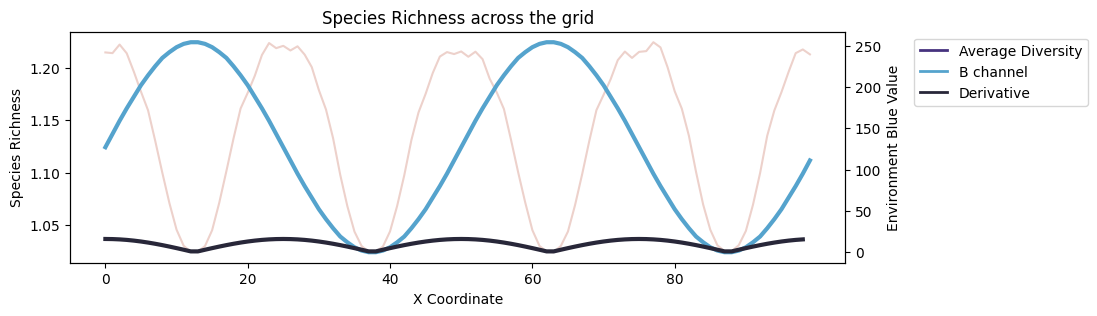

In [30]:
env_grids = grids['Environment'].unique()
for env in env_grids:
    env_data = grids[grids['Environment'] == env]
    col_data = combined_colsin[combined_colsin['Environment'] == env]
    
    # Create figure and primary axis
    fig, ax1 = plt.subplots(figsize=(10, 3))

    # Plot the SR data
    sns.lineplot( data = env_data, x = 'X coord', y = 'Species Richness', hue = 'Environment', color=sns.color_palette('viridis')[0], errorbar=None)

    # Set xticks at every 20 units
    ax1.set_xticks(range(0, len(stats['X coord']), 20))
    ax1.set_xlabel('X Coordinate')
    ax1.set_ylabel('Species Richness')
    ax1.set_title('Species Richness across the grid')

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    sns.lineplot(data=col_data, x='X coord', y='environment B value', ax=ax2, color=sns.color_palette('icefire')[0], linewidth = 3)
    ax2.set_ylabel("Environment Blue Value")


    #add derivative of sin env function
    # look if there are fucntions related to the environment function that would describe the diversity curve. 
    wavelength = env # define the variable that contains the wavelength
    cosfun = (255/2) * (1+ abs(np.cos(2 * np.pi * (list(range(0,99)) / wavelength)))) # this is just a cos fun that seems to describe well the diversity trend
    devsin = (255* np.pi * abs(np.cos(2 * np.pi * (list(range(0,99)) / wavelength))))/wavelength # this is the direvative of teh environment function
    # lineplot of derivative
    ax2.plot(list(range(0,99)) , devsin, color = sns.color_palette('icefire')[2], linewidth = 3 )
    
      
   # Custom legend
    legend_elements = [
        Line2D([0], [0], color=sns.color_palette('viridis')[0], lw=2, label='Average Diversity'),
        Line2D([0], [0], color=sns.color_palette('icefire')[0], lw=2, label='B channel', linewidth = 3),
        Line2D([0], [0], color=sns.color_palette('icefire')[2], lw=2, label='Derivative', linewidth = 3)
    ]
    ax1.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.08, 1))
    
    plt.show()


In [66]:
# average for each x coord
# average for all transects in the grid
average_grids = grids.groupby('X coord')['Species Richness'].mean().reset_index()


# average for all transects in the middle of picture
average_mid_transect = combined_transects.groupby('X coord')['Species Richness'].mean().reset_index()

# average for only first 100 transects
combined_transects_100 = combined_transects[combined_transects['Simulation'].str.extract(r'(\d+).txt$', expand=False).astype(int).between(1, 101)]
combined_transects_100 = combined_transects_100.groupby('X coord')['Species Richness'].mean().reset_index()

# average for only first 1000 transects
combined_transects_1000 = combined_transects[combined_transects['Simulation'].str.extract(r'(\d+).txt$', expand=False).astype(int).between(1, 1001)]
combined_transects_1000 = combined_transects_1000.groupby('X coord')['Species Richness'].mean().reset_index()   

# average for only first 100 transects
average_grids_100 = grid[grid['Simulation'].str.extract(r'(\d+).txt$', expand=False).astype(int).between(1, 101)]
average_grids_100 = average_grids_100.groupby('X coord')['Species Richness'].mean().reset_index()

# average for only first 1000 transects
average_grids_1000 = grid[grid['Simulation'].str.extract(r'(\d+).txt$', expand=False).astype(int).between(1, 1001)]
average_grids_1000 = average_grids_1000.groupby('X coord')['Species Richness'].mean().reset_index() 



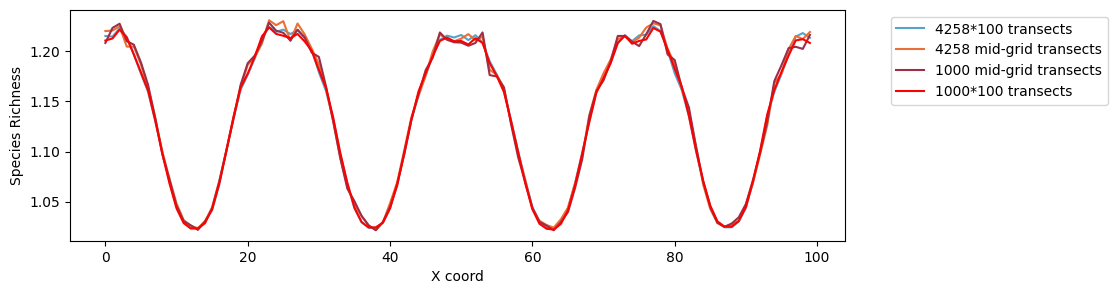

In [68]:
# Create figure and primary axis
plt.subplots(figsize=(10, 3))

# Plot the SR data
sns.lineplot(data = average_grids, x = 'X coord', y = 'Species Richness', color=sns.color_palette('icefire')[0], errorbar=None, label='4258*100 transects')
sns.lineplot(data = average_mid_transect, x = 'X coord', y = 'Species Richness', color=sns.color_palette('icefire')[5], errorbar=None,  label='4258 mid-grid transects')
sns.lineplot(data = combined_transects_1000, x = 'X coord', y = 'Species Richness', color=sns.color_palette('icefire')[4], errorbar=None, label='1000 mid-grid transects')
sns.lineplot(data = combined_transects_100, x = 'X coord', y = 'Species Richness', color=sns.color_palette('icefire')[2], errorbar=None,  label='100 mid-grid transects')
sns.lineplot(data = average_grids_100, x = 'X coord', y = 'Species Richness', color='blue', errorbar=None,  label='100*100 transects')
sns.lineplot(data = average_grids_1000, x = 'X coord', y = 'Species Richness', color='red', errorbar=None, label='1000*100 transects')

# Add legend
# Add legend outside the plot on the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()


## Heatmaps of biodiversity

I map the 100x100 px, in each cell I want the number of species counts.

In [ ]:
heatmaps = {}  # Dictionary to store heatmaps

for i, folder_path in enumerate(folder_paths):
    # create an empty dataframe to store all coordinates
    heatmap_data = []  # List to store individual heatmaps
    
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_.*\.txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            df = df[['X coord', 'Y coord', 'species ID']]
            # calculate species richness
            sc_matrix = df.groupby(['Y coord', 'X coord'])['species ID'].nunique().reset_index()
            sc_matrix['Batch Num'] = f'sim {match.group(0)}'
            sc_matrix = sc_matrix.rename(columns={'species ID': 'Species Richness'} )
            sc_matrix['Environment'] = folder_labels[i]
            
            heatmap_data.append(sc_matrix)

    # Combine all heatmap data for the current folder into one dataframe
    combined_heatmap = pd.concat(heatmap_data, ignore_index=True)
    
    # Store the heatmap data for the current folder in heatmaps dictionary
    heatmaps[folder_labels[i]] = combined_heatmap

    # Calculate the mean and pivot the data
    pivot_mean = combined_heatmap.pivot_table(index='Y coord', columns='X coord', values='Species Richness', aggfunc='mean')
    # Replace NaN values with 0
    pivot_mean = pivot_mean.fillna(0)
    
    # Create the heatmap plot
    sns.heatmap(pivot_mean, cmap='BuPu')
    plt.axis('off')
    plt.title(f'Heatmap for w = {folder_labels[i]}')  # Add a title to the plot
    plt.show()

In [ ]:
for folder_labels, heatmap_data in heatmaps.items():
    plt.subplots(figsize=(10, 3))
    sns.lineplot(data=heatmap_data, x='X coord', y='Species Richness', color=sns.color_palette('viridis')[0])
    plt.xlabel('X Coordinate')
    plt.ylabel('Species Richness')
    plt.title(f'Transect Diversity, w = {folder_labels}')
    plt.show()

In [ ]:
for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals
    # create an empty dataframe to store the transects in the current folder
    heatmap = pd.DataFrame(columns=['X coord', 'Y coord', 'Species Richness'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            df = df[['X coord', 'Y coord', 'species ID']]
            # calculate species richness
            sc_matrix = df.groupby(['Y coord', 'X coord'])['species ID'].nunique().reset_index()
            #sc_matrix['Batch Num'] = f'sim {match.group(1)}'
            sc_matrix = sc_matrix.rename(columns={'species ID': 'Species Richness'} )
            sc_matrix['Environment'] = folder_labels[i]
            
            # the following code is meant to be uncommented if you want an heatmap for each simulation
            #pivot = sc_matrix.pivot(index='Y coord', columns='X coord', values='Species Richness')
            # sns.heatmap(pivot, cmap='BuPu')
            # plt.axis('off')
            # plt.show()
            
            heatmap = pd.concat([heatmap, sc_matrix], ignore_index=True)

pivot_mean = heatmap.pivot_table(index='Y coord', columns='X coord', values='Species Richness', aggfunc='mean')
# Replace NaN values with 0
pivot_mean = pivot_mean.fillna(0)
sns.heatmap(pivot_mean, cmap='BuPu')
plt.axis('off')
plt.show()

In [ ]:
# Load the image to get its dimensions
img = mpimg.imread('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/environments/w50/w50_0RG.png')

# Create a single subplot grid with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6),gridspec_kw={'width_ratios': [1, 1.25]})  # Set the figure size to match the image

# Plot the heatmap in the first subplot (left side)
sns.heatmap(pivot_mean, cmap='BuPu', ax=axes[1], square=True, cbar_kws={"shrink": 0.8})  # Set square=True for a square aspect ratio

# Load and display the image in the second subplot (right side)
axes[0].imshow(img)
axes[1].axis('off')  # Turn off the axis for the image subplot
axes[0].axis('off')  # Turn off the axis for the image subplot

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# Create a directory to store the PNG files
if not os.path.exists('heatmap_images'):
    os.makedirs('heatmap_images')

for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals
    # create an empty dataframe to store the transects in the current folder
    heatmap = pd.DataFrame(columns=['X coord', 'Y coord', 'Species Richness', 'Batch Num'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            df = df[['X coord', 'Y coord', 'species ID']]
            # calculate species richness
            sc_matrix = df.groupby(['Y coord', 'X coord'])['species ID'].nunique().reset_index()
            #sc_matrix['Batch Num'] = f'sim {match.group(1)}'
            sc_matrix = sc_matrix.rename(columns={'species ID': 'Species Richness'})
            
            pivot = sc_matrix.pivot(index='Y coord', columns='X coord', values='Species Richness')
            sns.heatmap(pivot, cmap='BuPu')
            plt.axis('off')
            
            # Save the figure as a PNG file
            plt.savefig(f'heatmap_images/{filename[:-4]}.png')
            
            plt.close()  # Close the figure to release memory
            cd reversed
            heatmap = pd.concat([heatmap, sc_matrix], ignore_index=True)

# Create a list of image file paths
image_files = sorted([os.path.join('heatmap_images', f) for f in os.listdir('heatmap_images')])

# Create a list to store images
images = []
for image_file in image_files:
    images.append(imageio.imread(image_file))

# Save the list of images as a GIF
imageio.mimsave('heatmap.gif', images)

# Delete all the PNG files
for file in os.listdir('heatmap_images'):
    file_path = os.path.join('heatmap_images', file)
    os.remove(file_path)

# Delete the directory heatmap_images
os.rmdir('heatmap_images')


In [31]:
pal = sns.color_palette(palette='icefire')
pal.as_hex()


['#55a3cd', '#4954b0', '#282739', '#3b2127', '#9c2f45', '#e96f36']